In [102]:
import numpy as np
from scipy.optimize import fsolve, minimize
import math 

l_bounds = []
u_bounds = []

# define function and derivative
def f(k, n):
    return k**2/2 + n**2/(2*k) - k/2 - n/2

def df(k, n):
    return k - n**2/(2*k**2) - 1/2

# define epsilon
def epsilon(n):
    return n

# iterate over positive integer values of n
for n in range(1000, 10_000_000, 1000):
    # approximating the minimum
    min_point = minimize(lambda k: f(k, n), x0=n**(2/3)).x[0] # initial guess is n^(2/3)

    # define the bound equation
    bound_eq = lambda k: f(k, n) - (f(min_point, n) + epsilon(n))

    # find the interval bounds
    left_bound = fsolve(bound_eq, x0=min_point - 0.1*min_point)[0]
    l_bounds.append(left_bound)
    right_bound = fsolve(bound_eq, x0=min_point + 0.1*min_point)[0]
    u_bounds.append(right_bound)

    # compute the interval size
    interval_size = right_bound - left_bound

    #print(f"n={n}, interval is approximately [{round(left_bound, 4)}, {round(right_bound, 4)}] with size approximately {round(interval_size, 2)} for minimum k = {round(min_point, 2)}")


n=225500, interval is approximately [2570.296, 3345.053] with size approximately 774.76 for minimum k = 2940.67
n=225600, interval is approximately [2571.0819, 3346.0107] with size approximately 774.93 for minimum k = 2941.57
n=225700, interval is approximately [2571.8676, 3346.9683] with size approximately 775.1 for minimum k = 2942.38
n=225800, interval is approximately [2572.6532, 3347.9257] with size approximately 775.27 for minimum k = 2943.29
n=225900, interval is approximately [2573.4388, 3348.8829] with size approximately 775.44 for minimum k = 2944.15
n=226000, interval is approximately [2574.2242, 3349.8401] with size approximately 775.62 for minimum k = 2945.01
n=226100, interval is approximately [2575.0095, 3350.797] with size approximately 775.79 for minimum k = 2945.87
n=226200, interval is approximately [2575.7947, 3351.7539] with size approximately 775.96 for minimum k = 2946.75
n=226300, interval is approximately [2576.5797, 3352.7105] with size approximately 776.13 fo

Lower bound R^2: 1.0000, MSE: 104.6595
Upper bound R^2: 1.0000, MSE: 126.3384


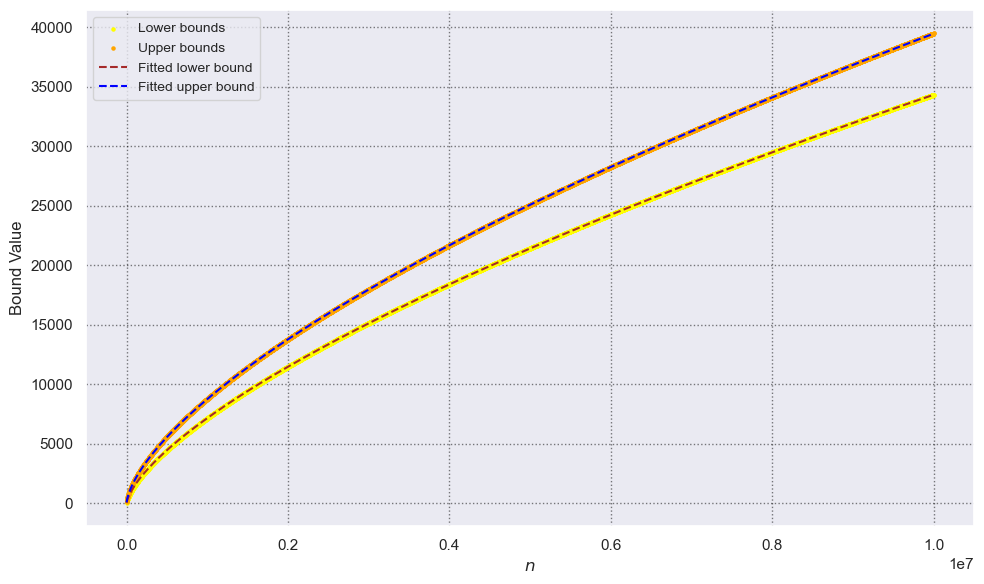

In [108]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
from sklearn.metrics import r2_score, mean_squared_error

sns.set(style='darkgrid')

# Assuming you have your n values and interval bounds
n_values = np.arange(1000, 10_000_000, 1000)  # replace with your actual n values
lower_bounds = l_bounds
upper_bounds = u_bounds

# Define the form of the function you want to fit
def simple_power_func(n, a, m):
    return a * n ** m

# Perform the curve fitting
popt_lower, _ = curve_fit(simple_power_func, n_values, lower_bounds)
popt_upper, _ = curve_fit(simple_power_func, n_values, upper_bounds)

# Predicted values
lower_predicted = simple_power_func(n_values, *popt_lower)
upper_predicted = simple_power_func(n_values, *popt_upper)

# Compute R^2 score
r2_lower = r2_score(lower_bounds, lower_predicted)
r2_upper = r2_score(upper_bounds, upper_predicted)


# Compute Mean Squared Errors
mse_lower = mean_squared_error(lower_bounds, lower_predicted)
mse_upper = mean_squared_error(upper_bounds, upper_predicted)

# Print the metrics
print("Lower bound R^2: {:.4f}, MSE: {:.4f}".format(r2_lower, mse_lower))
print("Upper bound R^2: {:.4f}, MSE: {:.4f}".format(r2_upper, mse_upper))

# Plot the original data, the fitted curves, and the predicted points
fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(n_values, lower_bounds, s=20, marker='.', color='yellow', label='Lower bounds')
ax.scatter(n_values, upper_bounds, s=20, marker='.', color='orange', label='Upper bounds')
ax.plot(n_values, lower_predicted, '--', linewidth=1.5, color='brown', label='Fitted lower bound')
ax.plot(n_values, upper_predicted, '--', linewidth=1.5, color='blue', label='Fitted upper bound')

ax.set_xlabel('$n$', fontsize=12)
ax.set_ylabel('Bound Value', fontsize=12)
ax.legend(fontsize=10)
plt.grid(True, linestyle='dotted', alpha=0.5, color='black') # important for maintaining style

plt.tight_layout()  # Improves spacing and alignment of the plot elements
plt.savefig('fitted_bounds_plot.png', dpi=300, facecolor='white')  # Save the plot with higher resolution

plt.show()

In [105]:
# lower bound coefficients
popt_lower

array([0.59152719, 0.68053571])

In [106]:
# upper bound coefficients
popt_upper

array([1.05171082, 0.6534756 ])